<a href="https://colab.research.google.com/github/sakshi2k02/Coffee_sales/blob/main/coffee_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from textblob import TextBlob

In [ ]:
data = pd.read_csv('coffee.csv')

In [ ]:
print(data)

           date datetime cash_type                 card  money  \
0      3/1/2024  15:50.5      card  ANON-0000-0000-0001  38.70   
1      3/1/2024  19:22.5      card  ANON-0000-0000-0002  38.70   
2      3/1/2024  20:18.1      card  ANON-0000-0000-0002  38.70   
3      3/1/2024  46:33.0      card  ANON-0000-0000-0003  28.90   
4      3/1/2024  48:14.6      card  ANON-0000-0000-0004  38.70   
...         ...      ...       ...                  ...    ...   
1128  7/31/2024  53:35.1      card  ANON-0000-0000-0443  23.02   
1129  7/31/2024  59:25.0      card  ANON-0000-0000-0040  27.92   
1130  7/31/2024  26:26.0      card  ANON-0000-0000-0444  32.82   
1131  7/31/2024  54:11.8      card  ANON-0000-0000-0445  32.82   
1132  7/31/2024  55:16.6      card  ANON-0000-0000-0446  32.82   

              coffee_name  
0                   Latte  
1           Hot Chocolate  
2           Hot Chocolate  
3               Americano  
4                   Latte  
...                   ...  
1128       

In [ ]:
data.head()

,date,datetime,cash_type,card,money,coffee_name
0,3/1/2024,15:50.5,card,ANON-0000-0000-0001,38.7,Latte
1,3/1/2024,19:22.5,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,3/1/2024,20:18.1,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,3/1/2024,46:33.0,card,ANON-0000-0000-0003,28.9,Americano
4,3/1/2024,48:14.6,card,ANON-0000-0000-0004,38.7,Latte


In [ ]:
data.describe()

,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


In [ ]:
data.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


In [ ]:
data.groupby('date').sum().max()

,0
datetime,59:55.901:40.219:19.420:31.512:16.130:26.747:0...
cash_type,cashcashcashcashcardcardcardcard
card,ANON-0000-0000-0423ANON-0000-0000-0437ANON-000...
money,650.48
coffee_name,LatteLatteLatteLatteLatteAmericano with Milk


Revenue of coffee sales

           coffee_name    money
7                Latte  9009.14
1  Americano with Milk  8601.94
2           Cappuccino  7333.14
0            Americano  4644.54
6        Hot Chocolate  2778.48
4              Cortado  2745.08
3                Cocoa  1295.94
5             Espresso  1100.62


Text(0.5, 1.0, 'Revenue by Coffee')

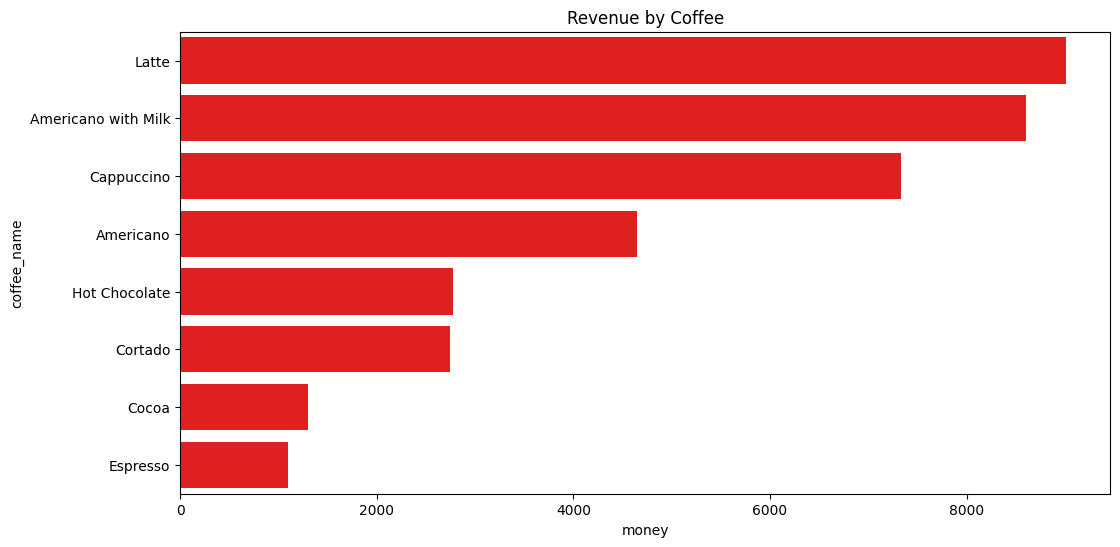

In [ ]:
revenue =data.groupby(['coffee_name']).sum(['money']).reset_index().sort_values(by='money',ascending=False)
print(revenue)
plt.figure(figsize=(12,6))
a = sns.barplot(data=revenue,x='money',y='coffee_name',color='red')
plt.title('Revenue by Coffee')



Counting the values of the most ordered drink by the crad users

In [ ]:
card_data = data[data['cash_type']=='card']

In [ ]:
card_top3_data = card_data['coffee_name'].value_counts().head(3).reset_index()
print(card_top3_data)

           coffee_name  count
0  Americano with Milk    253
1                Latte    218
2           Cappuccino    181


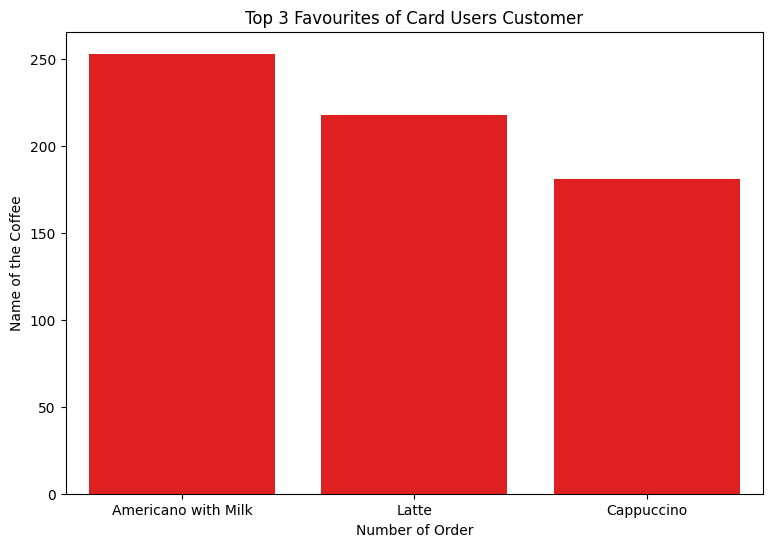

In [ ]:
plt.figure(figsize=(9,6))
plots = sns.barplot(x='coffee_name', y='count', data=card_top3_data, color='red')

plt.title("Top 3 Favourites of Card Users Customer")
plt.xlabel('Number of Order')
plt.ylabel('Name of the Coffee')

plt.show();



DISTRIBUTION OF COFFEE

In [ ]:
x = data.groupby(['coffee_name']).size().reset_index(name='counts')
print(x)

           coffee_name  counts
0            Americano     169
1  Americano with Milk     268
2           Cappuccino     196
3                Cocoa      35
4              Cortado      99
5             Espresso      49
6        Hot Chocolate      74
7                Latte     243


In [ ]:
piechart = px.pie(x, values = 'counts', names = 'coffee_name', title = 'Distribution Of Coffee')
piechart.show()

Payment by type

cash_type
card    1044
cash      89
dtype: int64


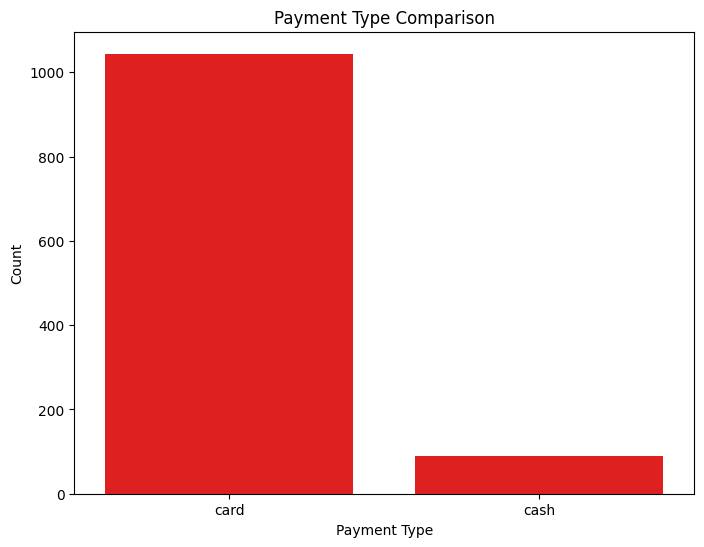

In [ ]:
payment_by_type = data.groupby('cash_type').size()
print(payment_by_type)
plt.figure(figsize = (8,6))
plt.title("Payment Type Comparison")
sns.barplot(x = payment_by_type.index, y = payment_by_type.values,color= 'red')
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.show()

PRICE OF EACH COFFEE

In [ ]:
coffee_name=data["coffee_name"]
coffee_price=data["money"]

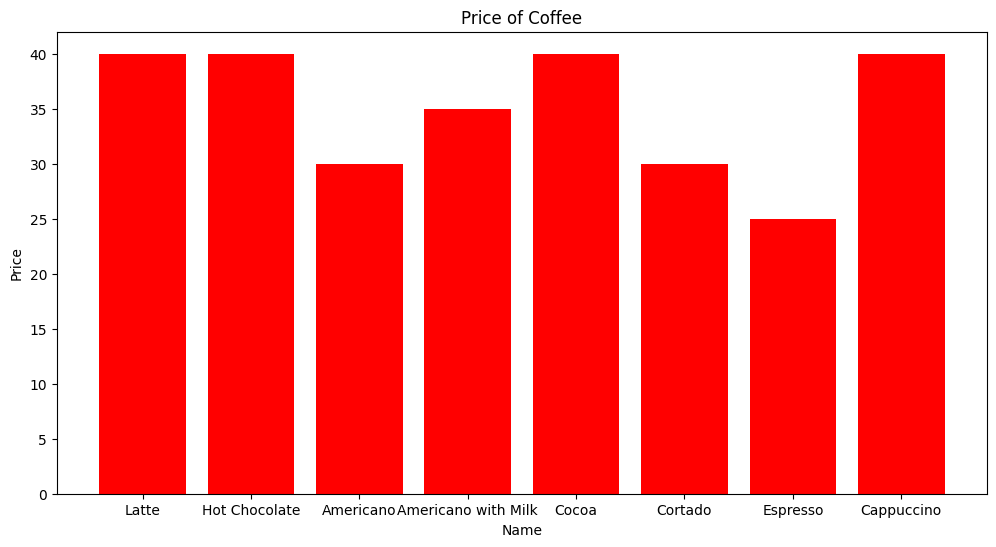

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(coffee_name ,coffee_price, color= 'red')
plt.xlabel("Name")
plt.ylabel("Price")

plt.title("Price of Coffee")
plt.show()

Coffee Types by Payment Type

In [ ]:
fig = px.histogram(data, x='cash_type', color='coffee_name', barmode='group', title='Coffee Types by Payment Type')
fig.show()